<a href="https://colab.research.google.com/github/HarshitaCnu/Cartooning-Of-An-Image/blob/main/Cartooning_Of_An_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python matplotlib

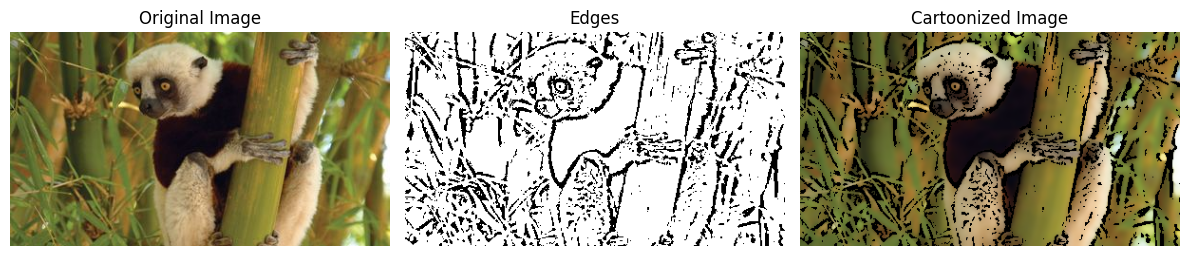

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

def cartoonize_image_from_url(image_url):
    # Step 1: Download the image from URL
    response = requests.get(image_url)
    img_data = BytesIO(response.content)
    img = Image.open(img_data)
    img = np.array(img)

    # Ensure the image has 3 channels (RGB)
    if img.ndim == 2:  # If grayscale, convert to RGB
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    elif img.shape[2] == 4:  # If RGBA, convert to RGB
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)

    # Step 2: Apply Bilateral Filter for Smoothing
    smooth = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

    # Step 3: Convert to Grayscale and Apply Edge Detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9
    )

    # Step 4: Combine Edges with Smoothed Image
    color = cv2.bitwise_and(smooth, smooth, mask=edges)

    return img, edges, color

# Input Image URL
image_url = "https://cdn.britannica.com/14/97314-050-BA499120/Coquerel-sifaka-type-lemur-Madagascar.jpg?w=400&h=225&c=crop"
# Cartoonize the image
original, edges, cartoon = cartoonize_image_from_url(image_url)

# Display Results
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Edges")
plt.imshow(edges, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Cartoonized Image")
plt.imshow(cartoon)
plt.axis("off")

plt.tight_layout()
plt.show()